# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as sc
# from scipy.stats import linregress
from pprint import pprint

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 603


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Test environment
 # Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
city = "Richmond"
units = "metric"

city_data = []

# Build query URL and request your results in Farenheit
query_url = f"{url}appid={weather_api_key}&q={city}&units={units}"

 # Make the Request
response = requests.get(query_url)
print(response.status_code)

# Extract data
data = response.json()
pprint(data)



200
{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': 37.5538, 'lon': -77.4603},
 'dt': 1732914914,
 'id': 4781708,
 'main': {'feels_like': 6.51,
          'grnd_level': 1009,
          'humidity': 52,
          'pressure': 1016,
          'sea_level': 1016,
          'temp': 8.62,
          'temp_max': 9.39,
          'temp_min': 7.75},
 'name': 'Richmond',
 'sys': {'country': 'US',
         'id': 2042621,
         'sunrise': 1732881879,
         'sunset': 1732917146,
         'type': 2},
 'timezone': -18000,
 'visibility': 10000,
 'weather': [{'description': 'broken clouds',
              'icon': '04d',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 280, 'speed': 3.6}}


In [4]:
city_weather = response.json()
    
            # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
city_lat = city_weather.get("coord", {}).get("lat")
city_lng = city_weather.get("coord", {}).get("lon")
city_max_temp = city_weather.get("main", {}).get("temp_max")
city_humidity = city_weather.get("main", {}).get("humidity")
city_clouds = city_weather.get("clouds", {}).get("all")
city_wind = city_weather.get("wind", {}).get("speed")
city_country = city_weather.get("sys", {}).get("country")
city_date = city_weather.get("dt")
# Append the City information into city_data list
city_data.append({"City": city,
    "Lat": city_lat,
    "Lng": city_lng,
    "Max Temp": city_max_temp,
    "Humidity": city_humidity,
    "Cloudiness": city_clouds,
    "Wind Speed": city_wind,
    "Country": city_country,
    "Date": city_date})


In [5]:
city_data

[{'City': 'Richmond',
  'Lat': 37.5538,
  'Lng': -77.4603,
  'Max Temp': 9.39,
  'Humidity': 52,
  'Cloudiness': 75,
  'Wind Speed': 3.6,
  'Country': 'US',
  'Date': 1732914914}]

In [6]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units={units}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = requests.get(city_url)
        if (response.status_code == 200):

            # Parse the JSON and retrieve data
            # Extract data
            city_weather = response.json()

            # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
            city_lat = city_weather.get("coord", {}).get("lat")
            city_lng = city_weather.get("coord", {}).get("lon")
            city_max_temp = city_weather.get("main", {}).get("temp_max")
            city_humidity = city_weather.get("main", {}).get("humidity")
            city_clouds = city_weather.get("clouds", {}).get("all")
            city_wind = city_weather.get("wind", {}).get("speed")
            city_country = city_weather.get("sys", {}).get("country")
            city_date = city_weather.get("dt")
            # Append the City information into city_data list
            city_data.append({"City": city,
                "Lat": city_lat,
                "Lng": city_lng,
                "Max Temp": city_max_temp,
                "Humidity": city_humidity,
                "Cloudiness": city_clouds,
                "Wind Speed": city_wind,
                "Country": city_country,
                "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | st. john's
Processing Record 2 of Set 1 | sisimiut
Processing Record 3 of Set 1 | olonkinbyen
Processing Record 4 of Set 1 | lebu
Processing Record 5 of Set 1 | waitangi
Processing Record 6 of Set 1 | bilibino
Processing Record 7 of Set 1 | west island
Processing Record 8 of Set 1 | papatowai
Processing Record 9 of Set 1 | albany
Processing Record 10 of Set 1 | nikopol
Processing Record 11 of Set 1 | puerto armuelles
Processing Record 12 of Set 1 | saipan
Processing Record 13 of Set 1 | bethel
Processing Record 14 of Set 1 | madang
Processing Record 15 of Set 1 | yellowknife
Processing Record 16 of Set 1 | susuman
Processing Record 17 of Set 1 | stanley
Processing Record 18 of Set 1 | oliver
Processing Record 19 of Set 1 | terrace
Processing Record 20 of Set 1 | mersing
Processing Record 21 of Set 1 | aasiaat
Processing Record 22 of Set 1 | lucapa
Processing Record 23 of Set 1 | georgetown
Proces

In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          579
Lat           579
Lng           579
Max Temp      579
Humidity      579
Cloudiness    579
Wind Speed    579
Country       579
Date          579
dtype: int64

In [8]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,st. john's,47.5649,-52.7093,6.27,96,100,11.83,CA,1732915055
1,sisimiut,66.9395,-53.6735,-8.00,87,100,3.01,GL,1732915120
2,olonkinbyen,70.9221,-8.7187,-7.43,59,21,7.60,SJ,1732915121
3,lebu,-37.6167,-73.6500,15.07,71,2,6.43,CL,1732915122
4,waitangi,-43.9535,-176.5597,12.68,68,60,4.92,NZ,1732915123


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,st. john's,47.5649,-52.7093,6.27,96,100,11.83,CA,1732915055
1,sisimiut,66.9395,-53.6735,-8.00,87,100,3.01,GL,1732915120
2,olonkinbyen,70.9221,-8.7187,-7.43,59,21,7.60,SJ,1732915121
3,lebu,-37.6167,-73.6500,15.07,71,2,6.43,CL,1732915122
4,waitangi,-43.9535,-176.5597,12.68,68,60,4.92,NZ,1732915123


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

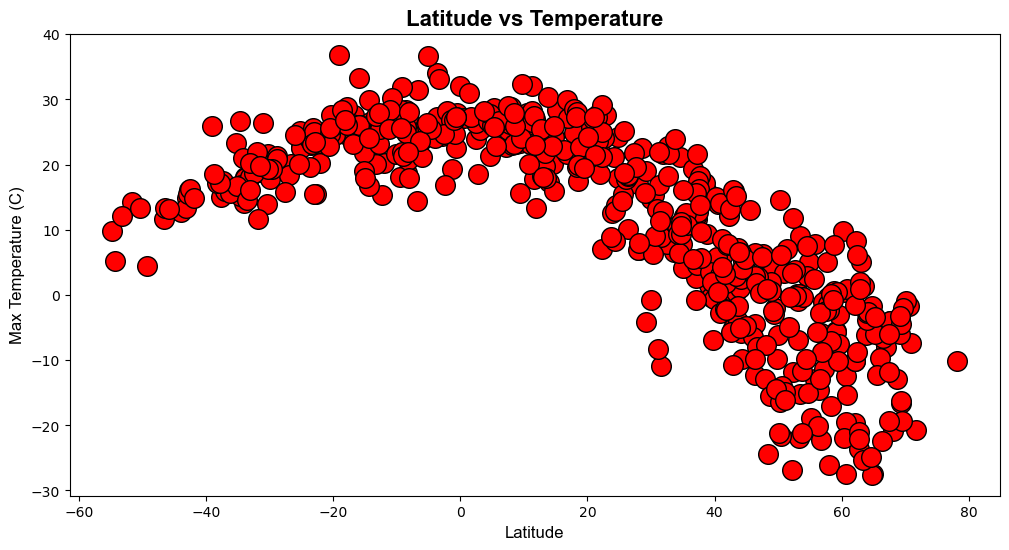

In [11]:
# Build scatter plot for latitude vs. temperature
 # make a scatter plot

# Change Canvas Size
plt.figure(figsize=(12, 6))

# Create a basic plot
plt.scatter(city_data_df.Lat, city_data_df["Max Temp"], color="red", edgecolor="black", s=200)

# Incorporate the other graph properties
# Add in reference lines
# Add Labels/Title
plt.xlabel("Latitude", fontfamily="Arial", fontsize=12)
plt.ylabel("Max Temperature (C)", fontfamily="Arial", fontsize=12)
plt.title("Latitude vs Temperature", fontweight="bold", fontsize=16, fontfamily="Arial")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

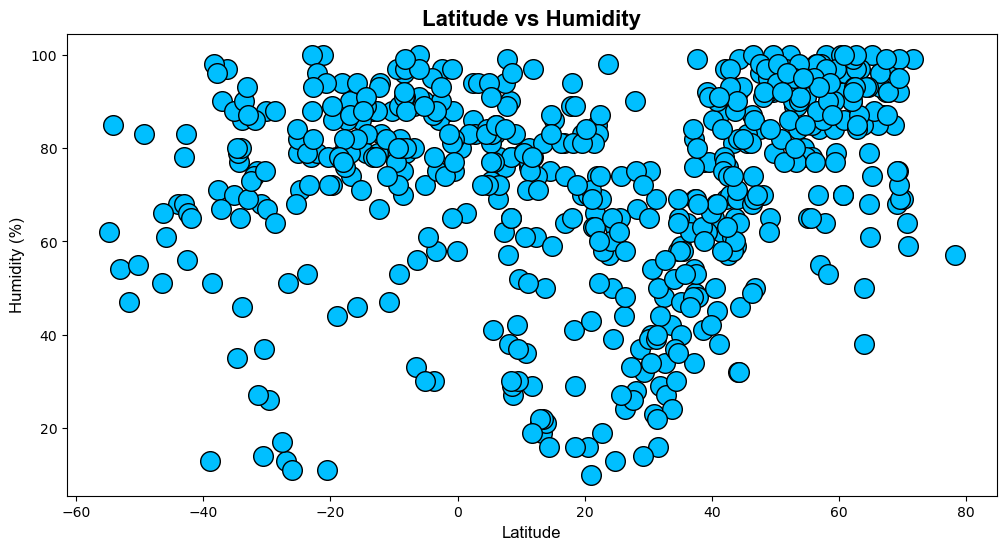

In [12]:
# Build scatter plot for latitude vs. Humidity
 # make a scatter plot

# Change Canvas Size
plt.figure(figsize=(12, 6))

# Create a basic plot
plt.scatter(city_data_df.Lat, city_data_df.Humidity, color="deepskyblue", edgecolor="black", s=200)

# Incorporate the other graph properties
# Add in reference lines
# Add Labels/Title
plt.xlabel("Latitude", fontfamily="Arial", fontsize=12)
plt.ylabel("Humidity (%)", fontfamily="Arial", fontsize=12)
plt.title("Latitude vs Humidity", fontweight="bold", fontsize=16, fontfamily="Arial")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

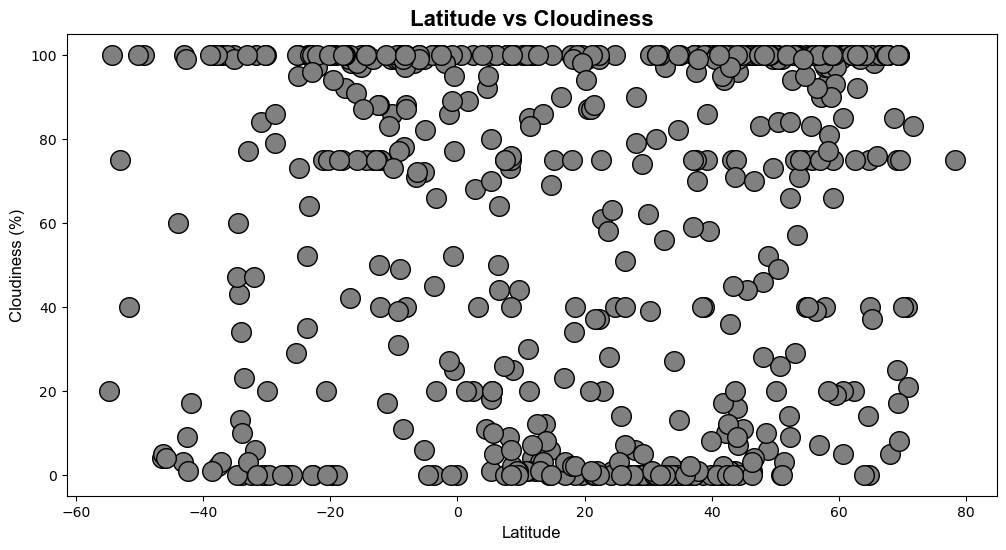

In [13]:
# Build scatter plot for latitude vs. Cloudiness
 # make a scatter plot

# Change Canvas Size
plt.figure(figsize=(12, 6))

# Create a basic plot
plt.scatter(city_data_df.Lat, city_data_df.Cloudiness, color="grey", edgecolor="black", s=200)

# Incorporate the other graph properties
# Add in reference lines
# Add Labels/Title
plt.xlabel("Latitude", fontfamily="Arial", fontsize=12)
plt.ylabel("Cloudiness (%)", fontfamily="Arial", fontsize=12)
plt.title("Latitude vs Cloudiness", fontweight="bold", fontsize=16, fontfamily="Arial")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

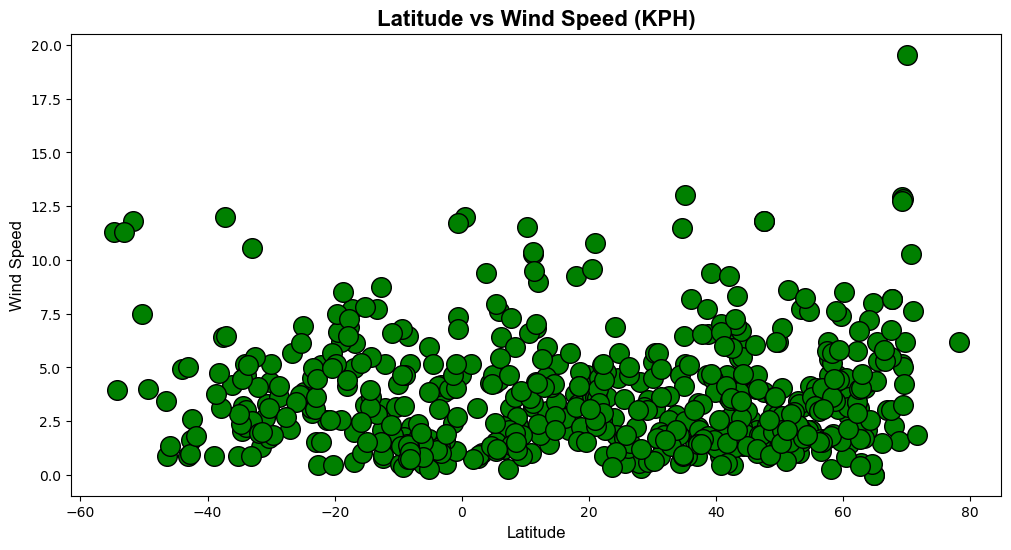

In [14]:
# Build scatter plot for latitude vs. Wind Speed
# make a scatter plot

# Change Canvas Size
plt.figure(figsize=(12, 6))

# Create a basic plot
plt.scatter(city_data_df.Lat, city_data_df["Wind Speed"], color="green", edgecolor="black", s=200)

# Incorporate the other graph properties
# Add in reference lines
# Add Labels/Title
plt.xlabel("Latitude", fontfamily="Arial", fontsize=12)
plt.ylabel("Wind Speed", fontfamily="Arial", fontsize=12)
plt.title("Latitude vs Wind Speed (KPH)", fontweight="bold", fontsize=16, fontfamily="Arial")
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [15]:
# Define a function to create Linear Regression plots
def do_regression_plot(x_values, y_values, x_label, y_label, annotation, color):  
    # do regression
    (slope, intercept, rvalue, pvalue, stderr) = sc.linregress(x_values, y_values)
    regress_values = x_values * slope + intercept # these are the points/predictions
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    print(rvalue)
    print(line_eq)

    # make a scatter plot

    # Change Canvas Size
    plt.figure(figsize=(12, 6))
    
    # Create a basic plot
    plt.scatter(x_values, y_values, color={color}, edgecolor="black", s=200)
    plt.plot(x_values, regress_values, color="black", linewidth=6) # the regression line
    
    # Incorporate the other graph properties
    # Add in reference lines
    # Add Labels/Title
    plt.xlabel(x_label, fontfamily="Arial", fontsize=12)
    plt.ylabel(y_label, fontfamily="Arial", fontsize=12)
    plt.title(f"{x_label} vs {y_label}", fontweight="bold", fontsize=16, fontfamily="Arial")

    # Annotate
    plt.annotate(line_eq, annotation, fontsize=15, color="black")
    
    # Show plot
    plt.show()



In [16]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df.Lat >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,st. john's,47.5649,-52.7093,6.27,96,100,11.83,CA,1732915055
1,sisimiut,66.9395,-53.6735,-8.00,87,100,3.01,GL,1732915120
2,olonkinbyen,70.9221,-8.7187,-7.43,59,21,7.60,SJ,1732915121
5,bilibino,68.0546,166.4372,-20.86,96,5,2.27,RU,1732915124
8,albany,42.6001,-73.9662,1.46,76,100,0.45,US,1732915127


In [17]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df.Lat <= 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,lebu,-37.6167,-73.6500,15.07,71,2,6.43,CL,1732915122
4,waitangi,-43.9535,-176.5597,12.68,68,60,4.92,NZ,1732915123
6,west island,-12.1568,96.8225,26.99,94,40,3.09,CC,1732915125
7,papatowai,-46.5619,169.4708,11.61,51,4,3.43,NZ,1732915126
13,madang,-5.2246,145.7966,25.50,90,99,1.66,PG,1732915133


###  Temperature vs. Latitude Linear Regression Plot

-0.8548287662778545
y = -1.11x + 45.61


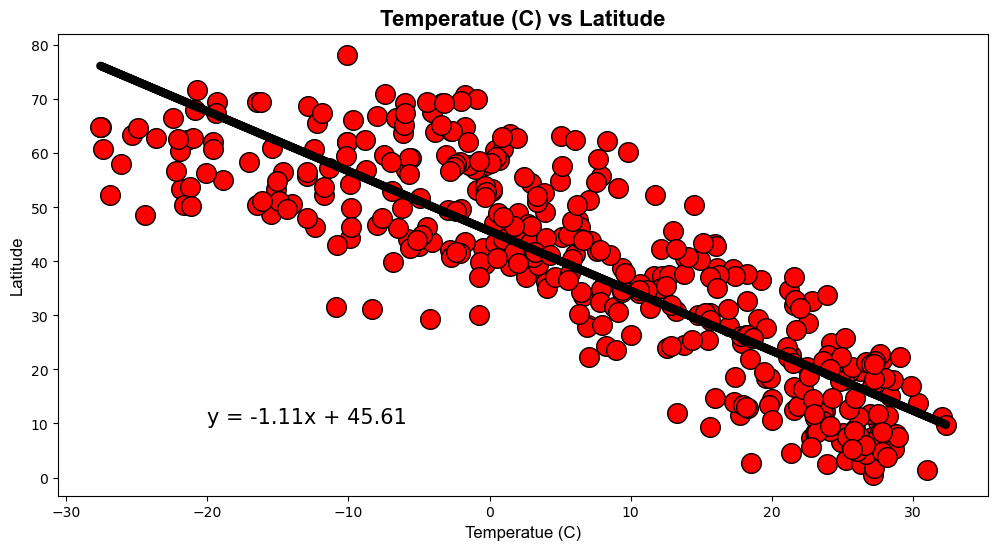

In [18]:
# Linear regression on Northern Hemisphere
# do_regression_plot(x_values, y_values, x_label, y_label, annotation, color): 
x_values = northern_hemi_df["Max Temp"]
y_values = northern_hemi_df.Lat
x_label = "Temperatue (C)"
y_label = "Latitude"
annotation = (-20, 10)
color = "red"

do_regression_plot(x_values, y_values, x_label, y_label, annotation, color)

0.7079429756830996
y = 1.74x + -58.9


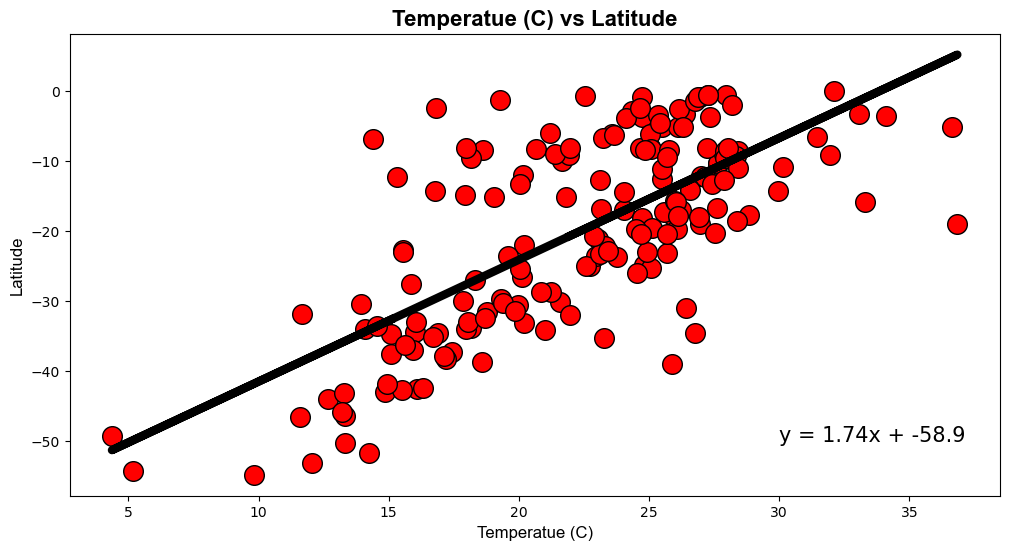

In [19]:
# Linear regression on Southern Hemisphere
# do_regression_plot(x_values, y_values, x_label, y_label, annotation, color): 
x_values = southern_hemi_df["Max Temp"]
y_values = southern_hemi_df.Lat
x_label = "Temperatue (C)"
y_label = "Latitude"
annotation = (30, -50)
color = "red"

do_regression_plot(x_values, y_values, x_label, y_label, annotation, color)

**Discussion about the linear relationship:** Both plots show that as temperature increases, distance from the equator approaches 0.

### Humidity vs. Latitude Linear Regression Plot

0.3696874884994741
y = 0.33x + 14.01


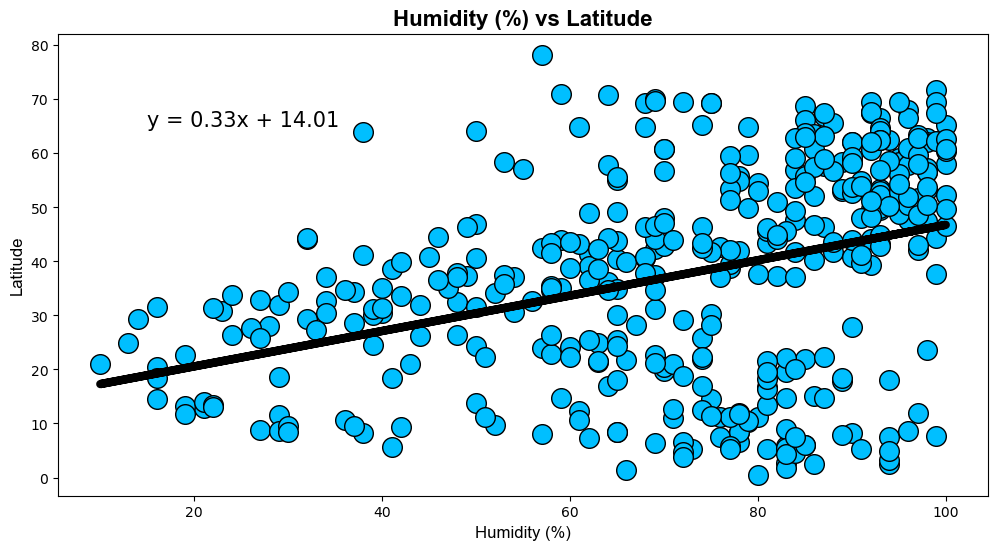

In [20]:
# Northern Hemisphere
# do_regression_plot(x_values, y_values, x_label, y_label, annotation, color): 
x_values = northern_hemi_df.Humidity
y_values = northern_hemi_df.Lat
x_label = "Humidity (%)"
y_label = "Latitude"
annotation = (15, 65)
color = "deepskyblue"

do_regression_plot(x_values, y_values, x_label, y_label, annotation, color)

0.27348001187083826
y = 0.19x + -34.48


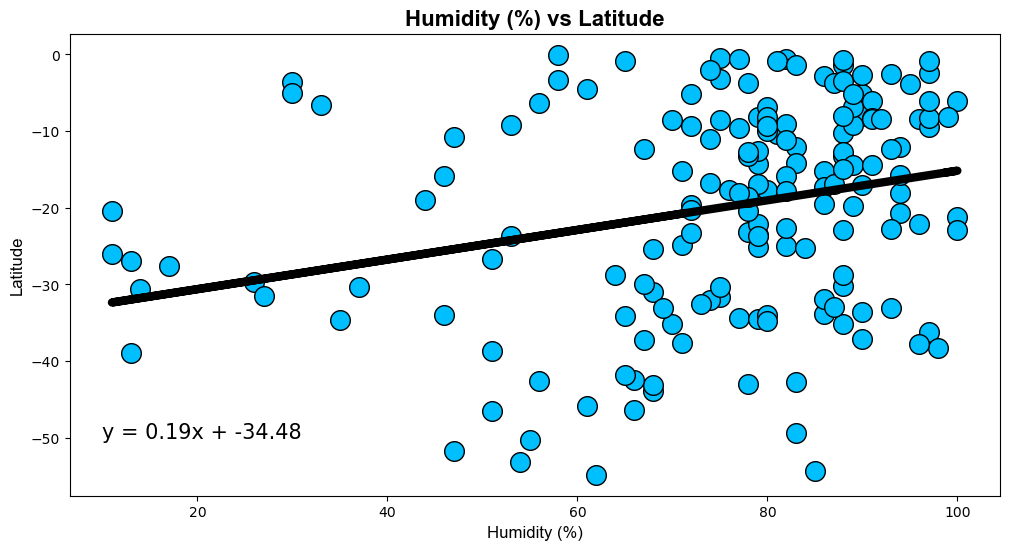

In [21]:
# Southern Hemisphere
# do_regression_plot(x_values, y_values, x_label, y_label, annotation, color): 
x_values = southern_hemi_df.Humidity
y_values = southern_hemi_df.Lat
x_label = "Humidity (%)"
y_label = "Latitude"
annotation = (10, -50)
color = "deepskyblue"

do_regression_plot(x_values, y_values, x_label, y_label, annotation, color)

**Discussion about the linear relationship:** There is a weak correlation between increasing humidity and increasing lattitude. 

### Cloudiness vs. Latitude Linear Regression Plot

0.25082182086390103
y = 0.12x + 30.7


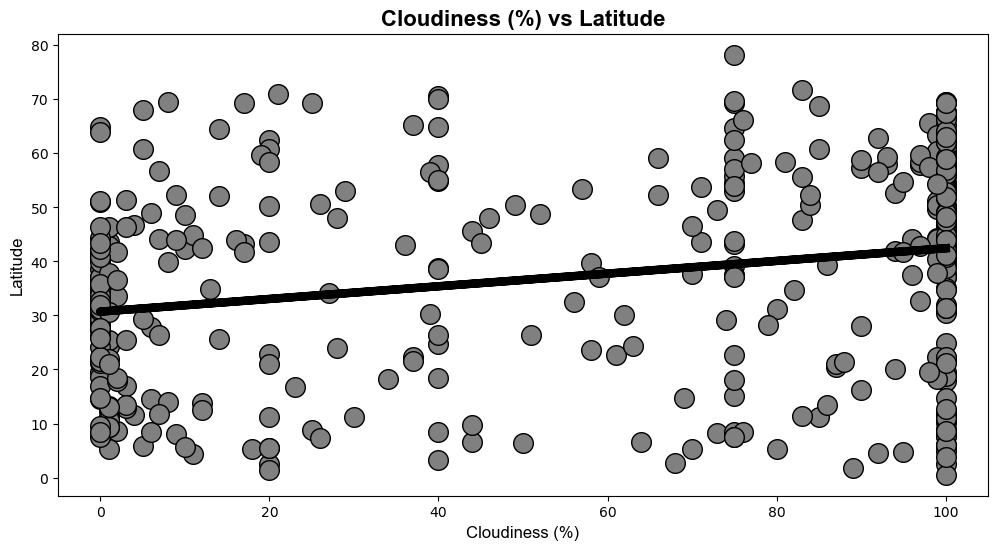

In [22]:
# Northern Hemisphere
# do_regression_plot(x_values, y_values, x_label, y_label, annotation, color): 
x_values = northern_hemi_df.Cloudiness
y_values = northern_hemi_df.Lat
x_label = "Cloudiness (%)"
y_label = "Latitude"
annotation = (-55, 20)
color = "grey"

do_regression_plot(x_values, y_values, x_label, y_label, annotation, color)

0.2759799828084424
y = 0.1x + -26.43


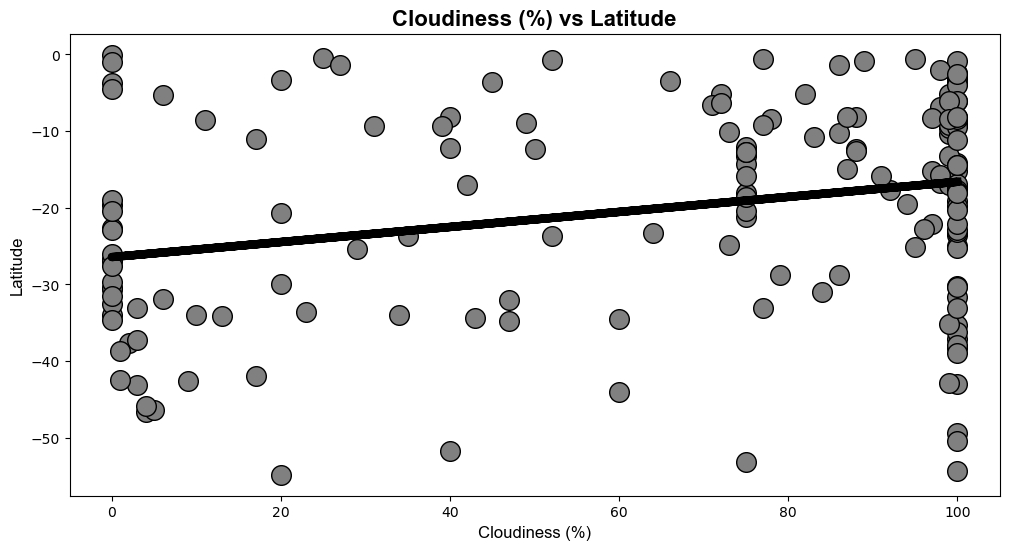

In [23]:
# Southern Hemisphere
# do_regression_plot(x_values, y_values, x_label, y_label, annotation, color): 
x_values = southern_hemi_df.Cloudiness
y_values = southern_hemi_df.Lat
x_label = "Cloudiness (%)"
y_label = "Latitude"
annotation = (-55, 20)
color = "grey"

do_regression_plot(x_values, y_values, x_label, y_label, annotation, color)

**Discussion about the linear relationship:** There is a stronger correlation between cloudiness and latitude in the northern hemisphere than there is in the south. Cloudiness tends to cluster around either 0% or 100%.

### Wind Speed vs. Latitude Linear Regression Plot

0.08063778675281473
y = 0.59x + 35.25


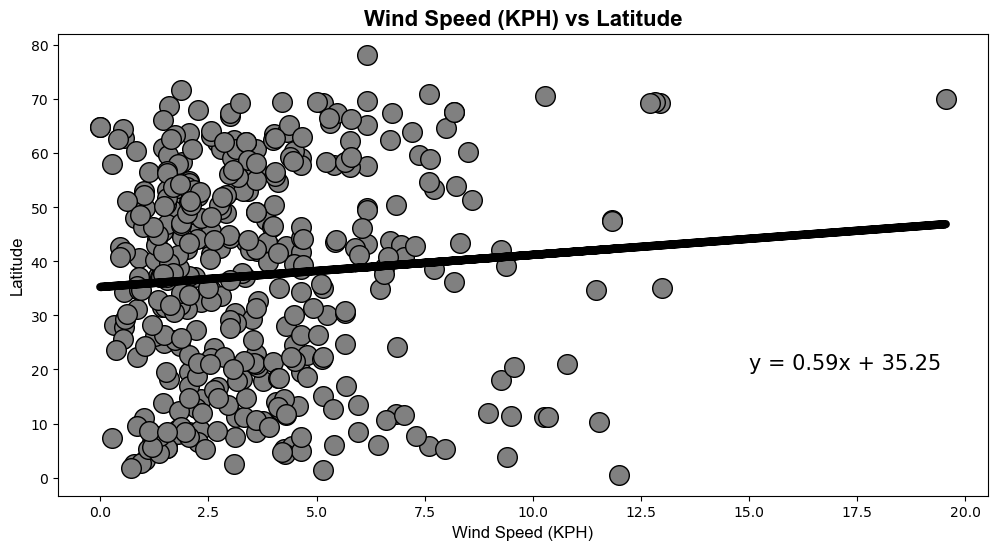

In [24]:
# Northern Hemisphere
# do_regression_plot(x_values, y_values, x_label, y_label, annotation, color): 
x_values = northern_hemi_df["Wind Speed"]
y_values = northern_hemi_df.Lat
x_label = "Wind Speed (KPH)"
y_label = "Latitude"
annotation = (15, 20)
color = "grey"

do_regression_plot(x_values, y_values, x_label, y_label, annotation, color)

-0.21080842338993272
y = -1.16x + -15.81


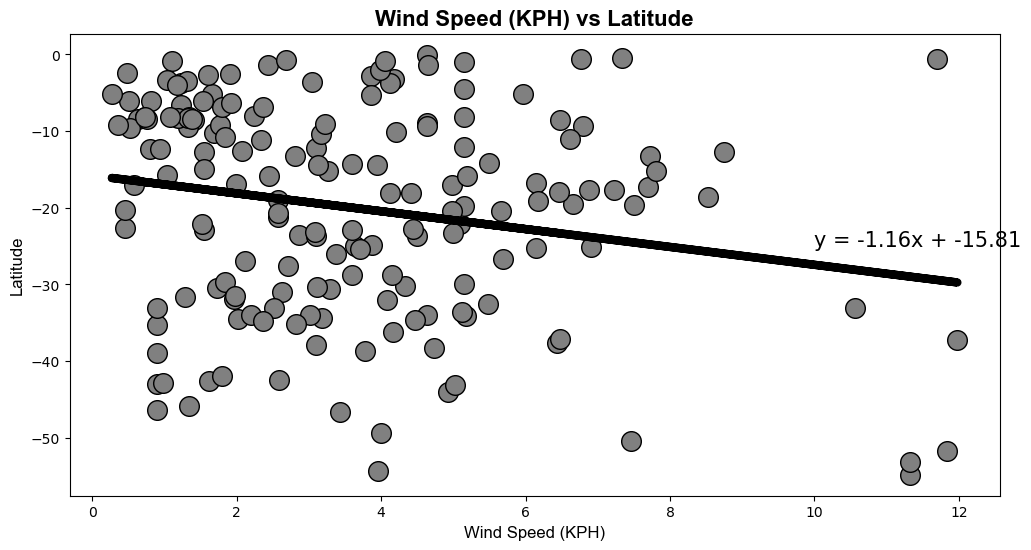

In [25]:
# Southern Hemisphere
# do_regression_plot(x_values, y_values, x_label, y_label, annotation, color): 
x_values = southern_hemi_df["Wind Speed"]
y_values = southern_hemi_df.Lat
x_label = "Wind Speed (KPH)"
y_label = "Latitude"
annotation = (10, -25)
color = "grey"

do_regression_plot(x_values, y_values, x_label, y_label, annotation, color)

### **Discussion about the linear relationship:** Wind Speed rarely exceeds 13 KPH.